In [215]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt


In [216]:
train_df=pd.read_csv('data/train.csv')
test_df=pd.read_csv('data/test.csv')
train_df

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False


## Preprocessing

In [217]:
test_df['CryoSleep'] = test_df['CryoSleep'].fillna(False)
train_df['CryoSleep'] = train_df['CryoSleep'].fillna(False)
train_df.CryoSleep=train_df.CryoSleep.astype(int)
test_df.CryoSleep=test_df.CryoSleep.astype(int)

test_df['VIP'] = test_df['VIP'].fillna(False)
train_df['VIP'] = train_df['VIP'].fillna(False)
train_df.VIP=train_df.VIP.astype(int)
test_df.VIP=test_df.VIP.astype(int)

train_df.Transported=train_df.Transported.astype(int)



## Feature Creation and Extraction

In [218]:
train_df[['Deck','Num','Side']]=train_df['Cabin'].str.split('/',expand=True)
test_df[['Deck','Num','Side']]=test_df['Cabin'].str.split('/',expand=True)

bins = [0, 18, 35, 50, 100]  # Define age bins
labels = ['Child', 'Young Adult', 'Adult', 'Senior']  # Labels for the bins
train_df['AgeGroup'] = pd.cut(train_df['Age'], bins=bins, labels=labels, right=False)
test_df['AgeGroup'] = pd.cut(test_df['Age'], bins=bins, labels=labels, right=False)

train_df['TotalBill']=train_df['RoomService']+train_df['FoodCourt']+train_df['ShoppingMall']+train_df['Spa']+train_df['VRDeck']
test_df['TotalBill']=test_df['RoomService']+test_df['FoodCourt']+test_df['ShoppingMall']+test_df['Spa']+test_df['VRDeck']

## Feature Transformation

In [219]:
train_df

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Deck,Num,Side,AgeGroup,TotalBill
0,0001_01,Europa,0,B/0/P,TRAPPIST-1e,39.0,0,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,0,B,0,P,Adult,0.0
1,0002_01,Earth,0,F/0/S,TRAPPIST-1e,24.0,0,109.0,9.0,25.0,549.0,44.0,Juanna Vines,1,F,0,S,Young Adult,736.0
2,0003_01,Europa,0,A/0/S,TRAPPIST-1e,58.0,1,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,0,A,0,S,Senior,10383.0
3,0003_02,Europa,0,A/0/S,TRAPPIST-1e,33.0,0,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,0,A,0,S,Young Adult,5176.0
4,0004_01,Earth,0,F/1/S,TRAPPIST-1e,16.0,0,303.0,70.0,151.0,565.0,2.0,Willy Santantines,1,F,1,S,Child,1091.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,0,A/98/P,55 Cancri e,41.0,1,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,0,A,98,P,Adult,8536.0
8689,9278_01,Earth,1,G/1499/S,PSO J318.5-22,18.0,0,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,0,G,1499,S,Young Adult,0.0
8690,9279_01,Earth,0,G/1500/S,TRAPPIST-1e,26.0,0,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,1,G,1500,S,Young Adult,1873.0
8691,9280_01,Europa,0,E/608/S,55 Cancri e,32.0,0,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,0,E,608,S,Young Adult,4637.0


In [220]:
target_features='Transported'
id_features=['PassengerId','Cabin','Name']
numerical_features=['Age','RoomService','FoodCourt','Spa','ShoppingMall','VRDeck','TotalBill']
categorical_features=['HomePlanet','Destination','Deck','AgeGroup','Side']
encoded_df=pd.get_dummies(test_df[categorical_features]).astype(int)

# Check and handle existing columns
for column in encoded_df.columns:
    if column in test_df.columns:
        # Drop the existing column before joining
        test_df = test_df.drop(column, axis=1)

# Join the encoded DataFrame
test_df = test_df.join(encoded_df)


In [221]:
encoded_df=pd.get_dummies(train_df[categorical_features]).astype(int)
for column in encoded_df.columns:
    if column in train_df.columns:
        # Drop the existing column before joining
        train_df = train_df.drop(column, axis=1)
train_df=train_df.join(encoded_df)


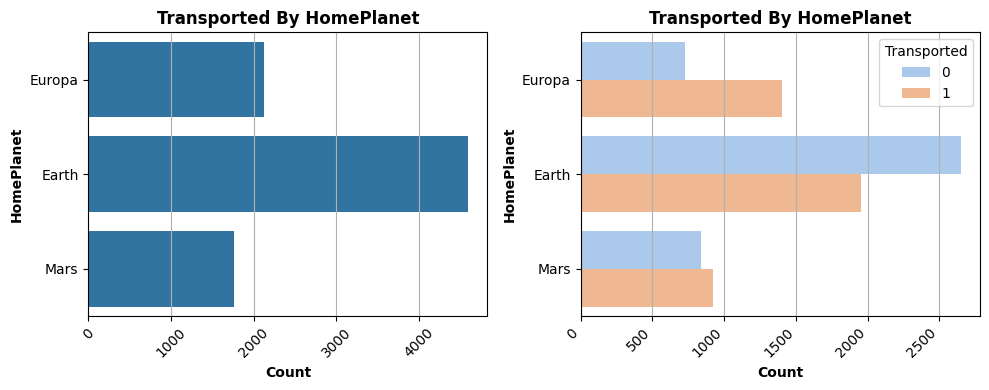

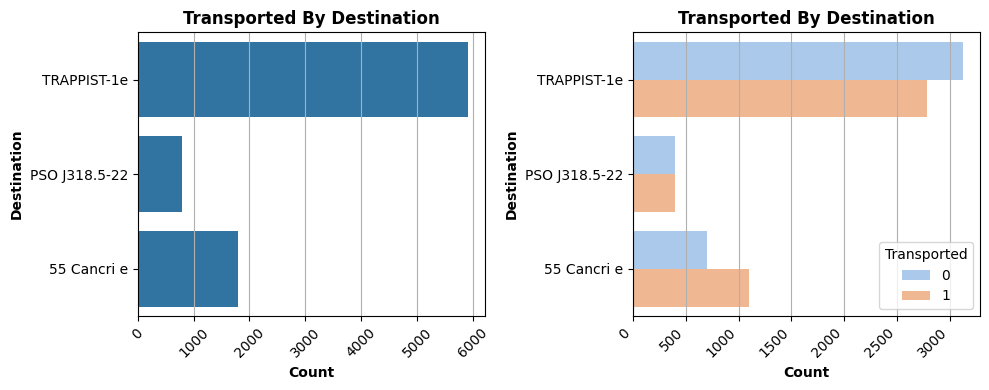

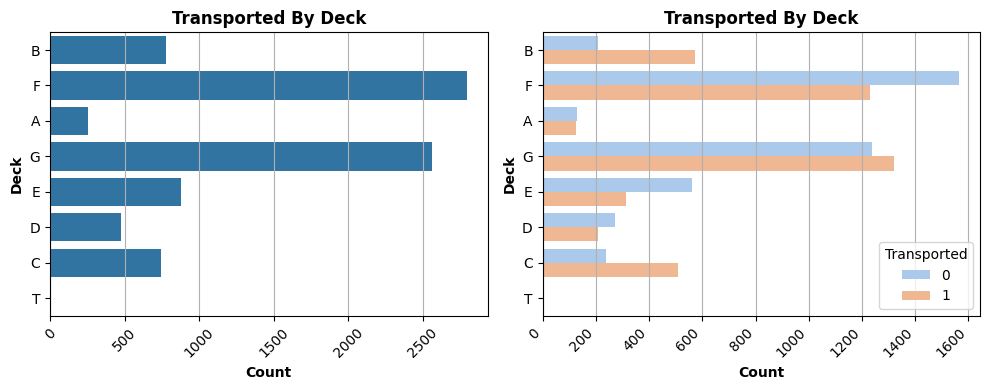

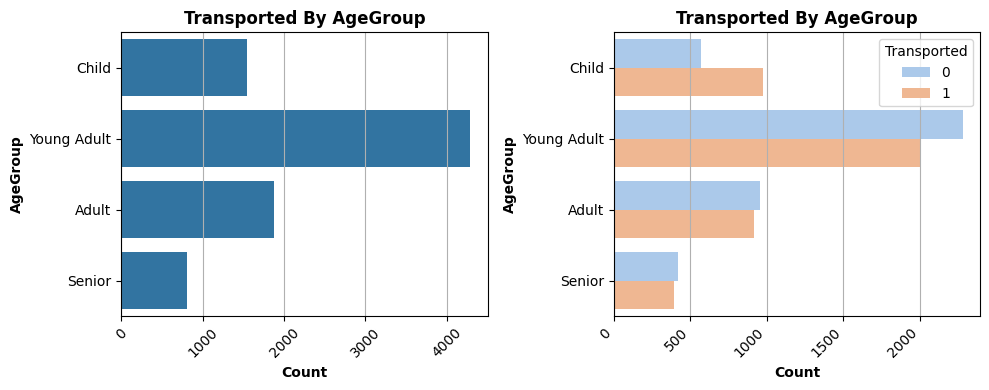

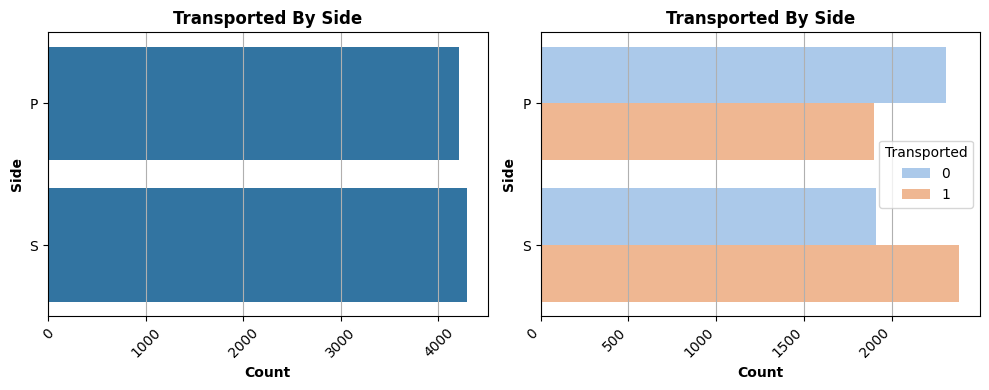

In [222]:
def plot_category_features(df,category,target):
    fig,axs=plt.subplots(nrows=1,ncols=2,figsize=(10,4))
    cmap=sns.color_palette('pastel',2)

    sns.countplot(data=df, y=category, ax=axs[0])
    axs[0].set_title(f'Transported By {category}', weight='bold')
    axs[0].grid(axis='x')
    axs[0].set_ylabel(category, weight='bold')
    axs[0].set_xlabel('Count', weight='bold')

    # Bar plot with hue
    sns.countplot(data=df, y=category, hue=target,  ax=axs[1], palette=cmap)
    axs[1].set_title(f'Transported By {category}', weight='bold')
    axs[1].grid(axis='x')
    axs[1].set_ylabel(category, weight='bold')
    axs[1].set_xlabel('Count', weight='bold')
    
    # Rotate labels
    for i in [0, 1]:
        for label in axs[i].get_xticklabels():
            label.set_rotation(45)

    

    
    fig.tight_layout()
    plt.xticks(rotation=45, ha='right')
    plt.show()
    
for category in categorical_features:
    plot_category_features(train_df,category,target_features)

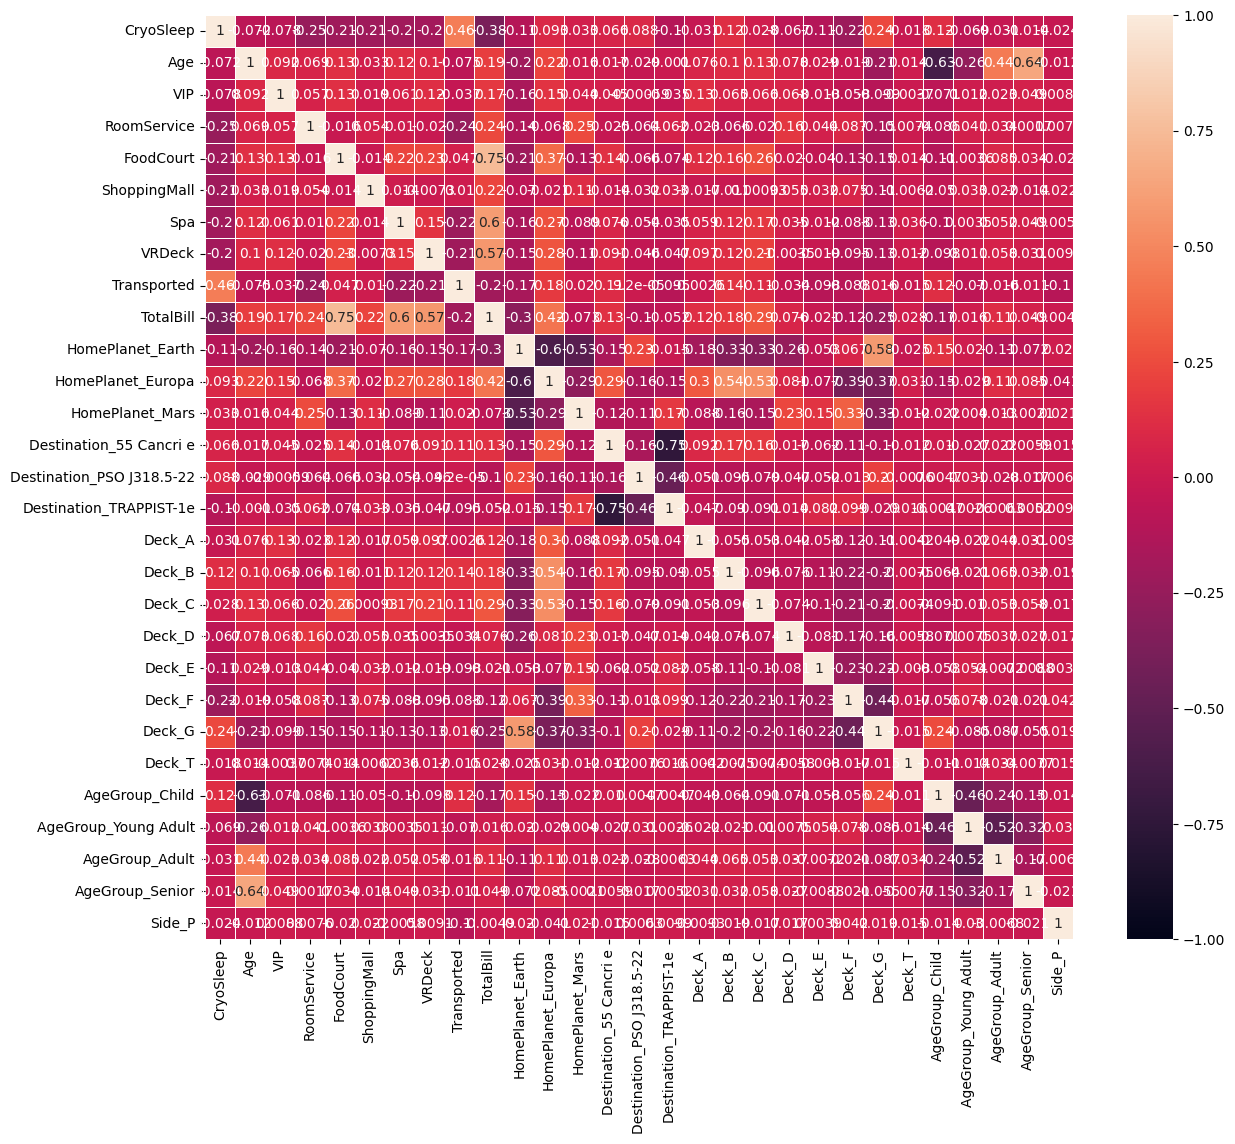

In [240]:
def plot_correlation(df):
    dff = df.drop(id_features, axis=1)
    # dff = one_hot_encode(dff, ['Embarked', 'Sex','AgeGroup'])

    
    corr = dff.select_dtypes('number').corr()
    
    cmap = sns.color_palette("coolwarm", as_cmap=True)
    
    fig, axs = plt.subplots(figsize=(14,12))
    sns.heatmap(corr, vmin=-1, vmax=1,annot=True, linewidth=0.5)
    plt.show()


plot_correlation(train_df)

In [234]:
from sklearn.preprocessing import StandardScaler


formatted_train_df=train_df.drop(id_features,axis=1)
formatted_train_df=formatted_train_df.select_dtypes('number')
# formatted_train_df=train_df[numerical_features.append('Targeted')]
formatted_train_df=formatted_train_df.fillna(0)
formatted_train_df = formatted_train_df.astype(int)
numerical_features=formatted_train_df.select_dtypes('number').columns
scaler = StandardScaler()
dff = pd.DataFrame()
dff[numerical_features] = scaler.fit_transform(formatted_train_df[numerical_features])
formatted_train_df.drop(numerical_features, axis=1).join(dff)
formatted_train_df.dropna(inplace=True)
formatted_train_df

,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,TotalBill,...,Deck_D,Deck_E,Deck_F,Deck_G,Deck_T,AgeGroup_Child,AgeGroup_Young Adult,AgeGroup_Adult,AgeGroup_Senior,Side_P
0,0,39,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
1,0,24,0,109,9,25,549,44,1,736,...,0,0,1,0,0,0,1,0,0,0
2,0,58,1,43,3576,0,6715,49,0,10383,...,0,0,0,0,0,0,0,0,1,0
3,0,33,0,0,1283,371,3329,193,0,5176,...,0,0,0,0,0,0,1,0,0,0
4,0,16,0,303,70,151,565,2,1,1091,...,0,0,1,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,0,41,1,0,6819,0,1643,74,0,8536,...,0,0,0,0,0,0,0,1,0,1
8689,1,18,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
8690,0,26,0,0,0,1872,1,0,1,1873,...,0,0,0,1,0,0,1,0,0,0
8691,0,32,0,0,1049,0,353,3235,0,4637,...,0,1,0,0,0,0,1,0,0,0


In [235]:
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split


y=formatted_train_df[target_features]
x=formatted_train_df.drop(target_features,axis=1)
x_train,x_val,y_train,y_val=train_test_split(x,y,test_size=0.2, random_state=1337,shuffle=True)

rf=RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1)
rf.fit(x_train,y_train)
rfc_pred = rf.predict(x_val)
rfc_acc = accuracy_score(y_val, rfc_pred)
print(f"RF Classifier accuracy: {rfc_acc:.6f}")

RF Classifier accuracy: 0.764232


In [236]:
from sklearn.ensemble import VotingClassifier
import xgboost as xgb
import lightgbm as lgb

lgbc = lgb.LGBMClassifier()
xgbc = xgb.XGBClassifier()
rfc = RandomForestClassifier(random_state=1,n_estimators=100)

# Fit data for each classifier
lgbc.fit(x_train, y_train)
xgbc.fit(x_train, y_train)
rfc.fit(x_train, y_train)
    
# Set up voting model for all the classifiers and fit
voters = [('lgbc', lgbc), ('xgbc', xgbc), ('rfc', rfc)]
vc = VotingClassifier(estimators=voters, voting='soft')
vc.fit(x_train, y_train)

# Predict
lgbc_pred = lgbc.predict(x_val)
xgbc_pred = xgbc.predict(x_val)
rfc_pred = rfc.predict(x_val)
vc_pred = vc.predict(x_val)

# Check prediction accuracy
lgbc_acc = accuracy_score(y_val, lgbc_pred)
xgbc_acc = accuracy_score(y_val, xgbc_pred)
rfc_acc = accuracy_score(y_val, rfc_pred)
vc_acc = accuracy_score(y_val, vc_pred)
print(f"LGB Classifier accuracy: {lgbc_acc:.6f}")
print(f"XGB Classifier accuracy: {xgbc_acc:.6f}")
print(f"RF Classifier accuracy: {rfc_acc:.6f}")
print(f"Voting Classifier accuracy: {vc_acc:.6f}")  

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 3479, number of negative: 3475
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000571 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1649
[LightGBM] [Info] Number of data points in the train set: 6954, number of used features: 27
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500288 -> initscore=0.001150
[LightGBM] [Info] Start training from score 0.001150
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 3479, number of negative: 3475
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000608 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise